<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating Classification Models on Humor Styles Data

_Authors: Kiefer Katovich (SF)_

---

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Humor Styles" survey.

This survey is designed to evaluate what "style" of humor subjects have. Your goal will be to classify gender using the responses on the survey.

## Humor styles questions encoding reference

### 32 questions:

Subjects answered **32** different questions outlined below:

    1. I usually don't laugh or joke with other people.
    2. If I feel depressed, I can cheer myself up with humor.
    3. If someone makes a mistake, I will tease them about it.
    4. I let people laugh at me or make fun of me at my expense more than I should.
    5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
    6. Even when I'm alone, I am often amused by the absurdities of life.
    7. People are never offended or hurt by my sense of humor.
    8. I will often get carried away in putting myself down if it makes family or friends laugh.
    9. I rarely make other people laugh by telling funny stories about myself.
    10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
    11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
    12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
    13. I laugh and joke a lot with my closest friends.
    14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
    15. I do not like it when people use humor as a way of criticizing or putting someone down.
    16. I don't often say funny things to put myself down.
    17. I usually don't like to tell jokes or amuse people.
    18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
    19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
    20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
    21. I enjoy making people laugh.
    22. If I am feeling sad or upset, I usually lose my sense of humor.
    23. I never participate in laughing at others even if all my friends are doing it.
    24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
    25. I donít often joke around with my friends.
    26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
    27. If I don't like someone, I often use humor or teasing to put them down.
    28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
    29. I usually can't think of witty things to say when I'm with other people.
    30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
    31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
    32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

---

### Response scale:

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]
    
---

### Demographics:

    age: entered as as text then parsed to an interger.
    gender: chosen from drop down list (1=male, 2=female, 3=other, 0=declined)
    accuracy: How accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### 1. Load the data and perform any EDA and cleaning you think is necessary.

It is worth reading over the description of the data columns above for this.

In [4]:
hsq = pd.read_csv('./datasets/hsq_data.csv')

In [5]:
# A:
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


### 2. Set up a predictor matrix to predict `gender` (only male vs. female)

Choice of predictors is up to you. Justify which variables you include.

In [17]:
# A:
hsq_m_f = hsq[(hsq['gender'] == 1) | (hsq['gender'] == 2)]

In [30]:
# Baseline Accuracy
m_f_proportion = dict(hsq_m_f['gender'].value_counts())
m_f_baseline = float(m_f_proportion[1])/(m_f_proportion[1] + m_f_proportion[2])

In [36]:
# Set up Predictor X and Target Y
X = hsq_m_f.loc[:,'affiliative':]
Y = hsq_m_f['gender']
X.drop(columns='gender', inplace=True)

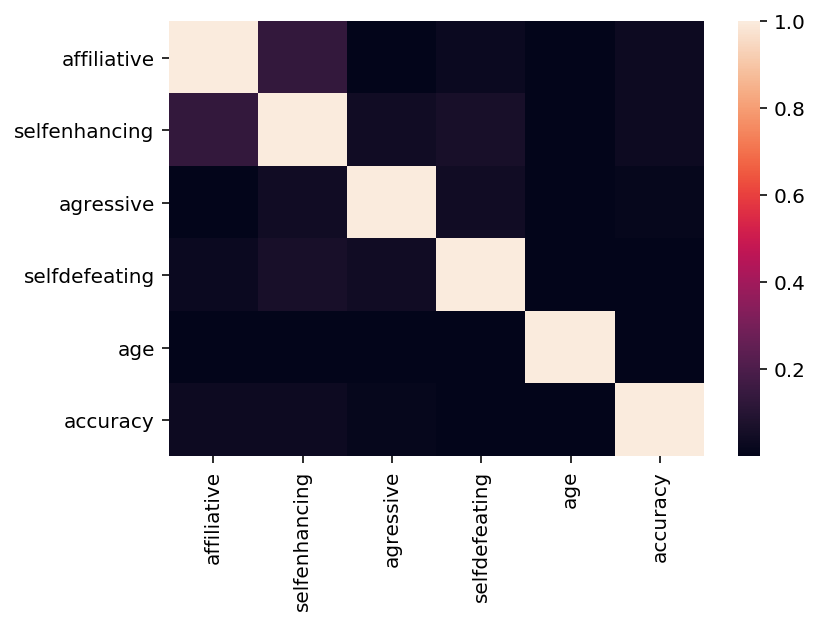

In [39]:
# Check Predictors using HeatMap
sns.heatmap(X.corr()**2)
# Looks good, none of the predictors are correlated
# I used the behavioral columns as predictors as they act as summary data to all the responses

### 3. Fit a Logistic Regression model and compare your cross-validated accuracy to the baseline.

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score

In [58]:
# A:
ss = StandardScaler()
mms = MinMaxScaler()
Xs = ss.fit_transform(X)
Xn = mms.fit_transform(X)
logreg = LogisticRegression()
logreg.fit(Xn, Y.values)
print 'Logreg intercept:', logreg.intercept_
print 'Logreg coef(s):', logreg.coef_
print 'Logreg predicted probabilities:', logreg.predict_proba(Xstd[0:5,:])

Logreg intercept: [-0.00653752]
Logreg coef(s): [[-0.3981493   0.62527509  0.99100517 -1.21316193  0.2503997  -0.2826136 ]]
Logreg predicted probabilities: [[ 0.31149767  0.68850233]
 [ 0.11773683  0.88226317]
 [ 0.10615297  0.89384703]
 [ 0.56540112  0.43459888]
 [ 0.10166874  0.89833126]]


In [61]:
# Get all cross-validated scores
raw_r2 = cross_val_score(logreg, X, Y.values, cv=25)
std_r2 = cross_val_score(logreg, Xs, Y.values, cv=25)
norm_r2 = cross_val_score(logreg, Xn, Y.values, cv=25)

print 'Original mean humor styles:', np.mean(raw_r2), 'std humor styles:', np.std(raw_r2)
print 'Standadized mean humor styles:', np.mean(std_r2), 'std humor styles:', np.std(std_r2)
print 'Normalized mean humor styles:', np.mean(norm_r2), 'std humor styles:', np.std(norm_r2)
print 'Baseline Accuracy:', m_f_baseline

Original mean humor styles: 0.550100674519 std humor styles: 0.0589377518455
Standadized mean humor styles: 0.551939997987 std humor styles: 0.0622401151802
Normalized mean humor styles: 0.545427363334 std humor styles: 0.046690315299
Baseline Accuracy: 0.549149338374


### 4. Create a 50-50 train-test split. Fit the model on training and get the predictions and predicted probabilities on the test data.

In [6]:
# A:

### 5. Manually calculate the true positives, false positives, true negatives, and false negatives.

In [7]:
# A:

### 6. Construct the confusion matrix. 

In [8]:
# A:

### 7. Print out the false positive count as you change your threshold for predicting label 1.

In [9]:
# A:

### 8. Plot an ROC curve using your predicted probabilities on the test data.

Calculate the area under the curve.

> *Hint: go back to the lecture to find code for plotting the ROC curve.*

In [10]:
from sklearn.metrics import roc_curve, auc

In [11]:
# A:

### 9. Cross-validate a logistic regression with a Ridge penalty.

Logistic regression can also use the Ridge penalty. Sklearn's `LogisticRegressionCV` class will help you cross-validate an appropriate regularization strength.

**Important `LogisticRegressionCV` arguments:**
- `penalty`: this can be one of `'l1'` or `'l2'`. L1 is the Lasso, and L2 is the Ridge.
- `Cs`: How many different (automatically-selected) regularization strengths should be tested.
- `cv`: How many cross-validation folds should be used to test regularization strength.
- `solver`: When using the lasso penalty, this should be set to `'liblinear'`

> **Note:** The `C` regularization strength is the *inverse* of alpha. That is to say, `C = 1./alpha`

In [12]:
from sklearn.linear_model import LogisticRegressionCV

In [13]:
# A:

**9.B Calculate the predicted labels and predicted probabilities on the test set with the Ridge logisitic regression.**

In [14]:
# A:

**9.C Construct the confusion matrix for the Ridge LR.**

In [15]:
# A:

### 10. Plot the ROC curve for the original and Ridge logistic regressions on the same plot.

Which performs better?

In [16]:
# A:

### 11. Cross-validate a Lasso logistic regression.

**Remember:**
- `penalty` must be set to `'l1'`
- `solver` must be set to `'liblinear'`

> **Note:** The lasso penalty can be considerably slower. You may want to try fewer Cs or use fewer cv folds.

In [17]:
# A:

### 12. Make the confusion matrix for the Lasso model.

In [18]:
# A:

### 13. Plot all three logistic regression models on the same ROC plot.

Which is the best? (if any)

In [19]:
# A:

### 14. Look at the coefficients for the Lasso logistic regression model. Which variables are the most important?

In [20]:
# A: